# **SHAP values**

Deep SHAP is a high-speed approximation algorithm for SHAP values in deep learning models that builds on a connection with DeepLIFT described in the SHAP NIPS paper. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shap

from tensorflow.keras.models import load_model

DATA_DIR = '../Datasets/'
MODELS_DIR = '../Models/'

TEST_PATH = DATA_DIR + '/Dataset_test_CF.csv'

# Neccesary info for loading models
#Pres_mean = 590.292648
#Pres_std = 30315.169840
Pres_mean = 548.729493
Pres_std = 30275.282659
MODEL_PATH = MODELS_DIR + 'Pres_Cp3D_CF_unnorm.h5'

SAMPLES = 1_000
#SAMPLES = 10_000
#SAMPLES = 100_000

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2024-11-05 10:20:39.767768: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-05 10:20:39.769525: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 10:20:39.793376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 10:20:39.793399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 10:20

Load datasets and model, then fit explainer and return SHAP values:

In [ ]:
def show_shap_values(test_path, model_path, reduced_size=None):
    
    model = load_model(model_path)

    X_test = pd.read_csv(test_path, index_col=0)
    X_test.reset_index(drop=True, inplace=True)

    if reduced_size:
        test_data = X_test.sample(n=reduced_size, replace=False).to_numpy()
    else:
        test_data = X_test.to_numpy()

    explainer = shap.Explainer(model, test_data, feature_names=X_test.columns)
    shap_values = explainer(test_data)

    return shap_values

## Default model

Plots for the vanilla model and dataset.

In [ ]:
""" shap_values_default = show_shap_values(TEST_PATH, MODEL_PATH, SAMPLES)

# Save shap values
import joblib  # for saving the SHAP values
joblib.dump(shap_values_default, 'shap_Pres.sav') """

In [ ]:
""" # Load shap values
shap_values_default = joblib.load('shap_Pres.sav') """


In [ ]:
""" shap.plots.beeswarm(shap_values_default/1000, max_display=10) """

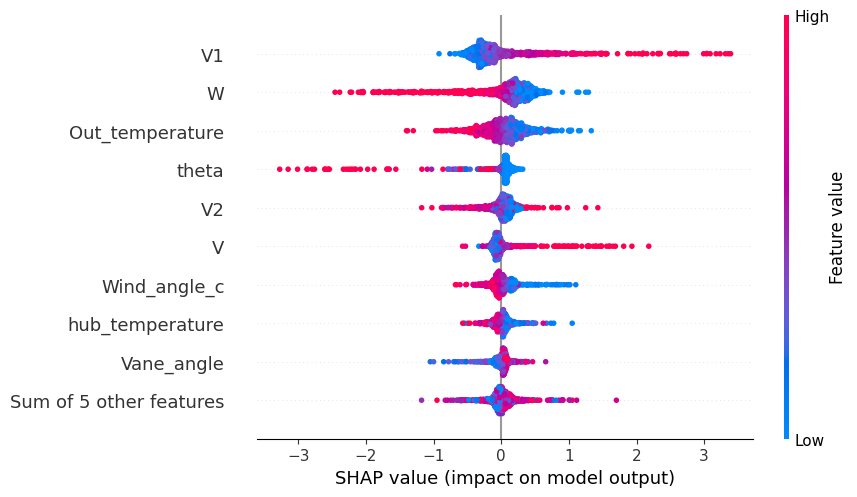

In [11]:
""" # Removing outliers:
shap_values_default_no_out = shap_values_default
shap_values_default_no_out.values = np.clip(shap_values_default_no_out.values, -20, 20)

shap.plots.beeswarm(shap_values_default_no_out, max_display=10) """

In [ ]:
""" shap.plots.waterfall(shap_values_default[0]/1000, max_display=20) """

In [ ]:
""" shap.plots.bar(shap_values_default/1000, max_display=20) """

In [ ]:
""" # Scatter plot of shap value vs variable

print(shap_values_default.values.shape)
print(shap_values_default.base_values.shape)
print(shap_values_default.data.shape)
print(shap_values_default.feature_names)

x_id = shap_values_default.feature_names.index("V")
y_id = shap_values_default.feature_names.index("V")
plt.scatter(shap_values_default.data[:,x_id],shap_values_default.values[:,y_id]/1000)
plt.xlabel(shap_values_default.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values_default.feature_names[y_id])
plt.show()

x_id = shap_values_default.feature_names.index("Out_temperature")
y_id = shap_values_default.feature_names.index("Out_temperature")
plt.scatter(shap_values_default.data[:,x_id],shap_values_default.values[:,y_id]/1000)
plt.xlabel(shap_values_default.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values_default.feature_names[y_id]) """

### Correlation Filter model

Plots for the vanilla model and dataset.

In [ ]:
shap_values = show_shap_values(TEST_PATH, MODEL_PATH, SAMPLES)

# Save shap values
import joblib  # for saving the SHAP values
joblib.dump(shap_values, 'shap_Pres.sav')

2024-11-05 10:23:16.246387: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ExactExplainer explainer: 1001it [00:29, 23.96it/s]                          


['shap_Pres_CF.sav']

In [6]:
# Load shap values
shap_values_CF = joblib.load('shap_Pres_CF.sav')

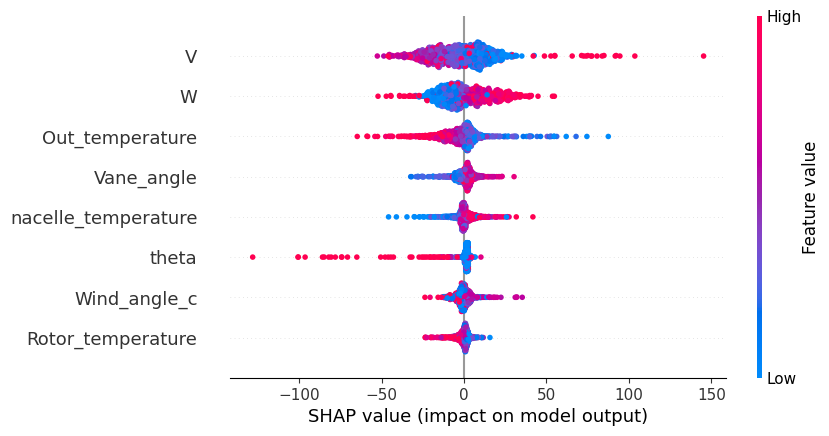

In [ ]:
shap.plots.beeswarm(shap_values/1000, max_display=10)

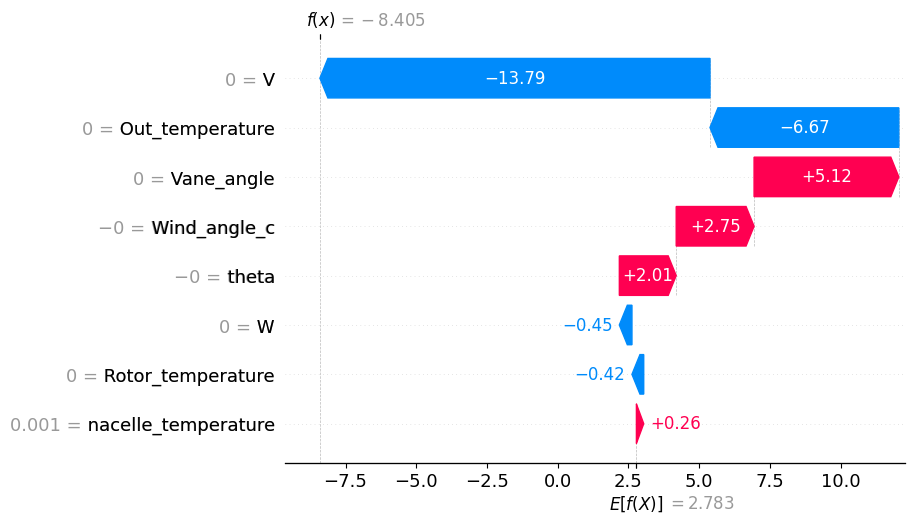

In [ ]:
shap.plots.waterfall(shap_values[0]/1000, max_display=20)

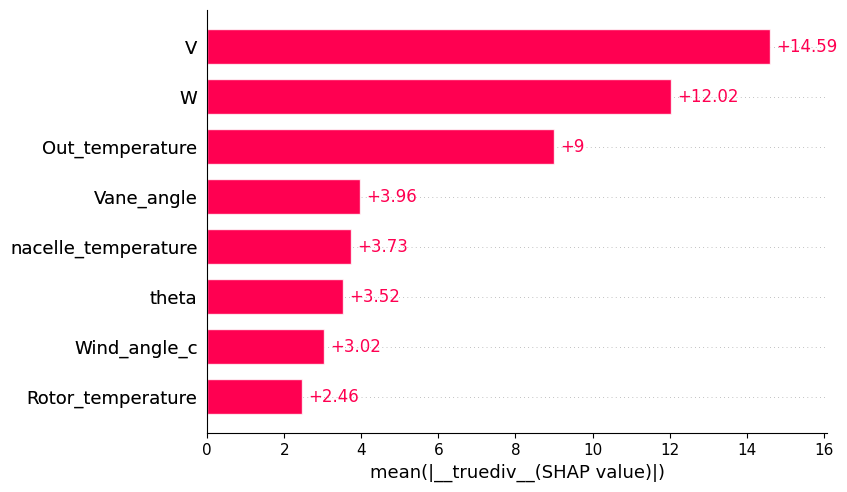

In [ ]:
shap.plots.bar(shap_values/1000, max_display=20)

(1000, 8)
(1000, 1)
(1000, 8)
['theta', 'nacelle_temperature', 'V', 'Vane_angle', 'Out_temperature', 'W', 'Rotor_temperature', 'Wind_angle_c']


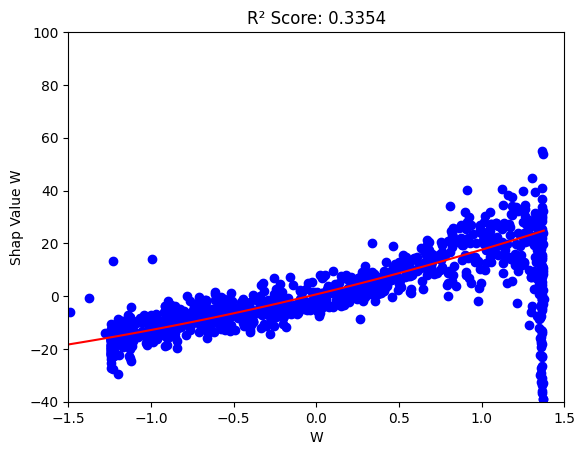

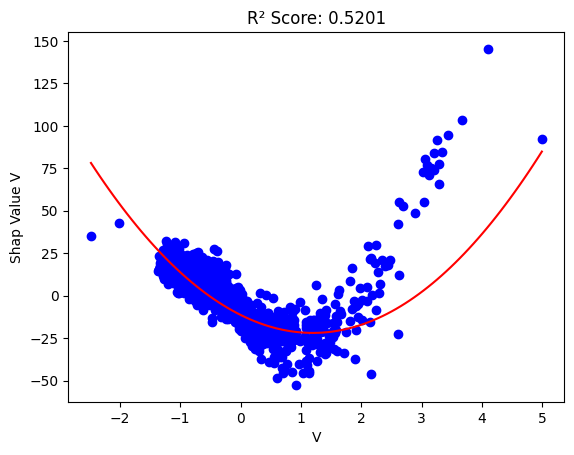

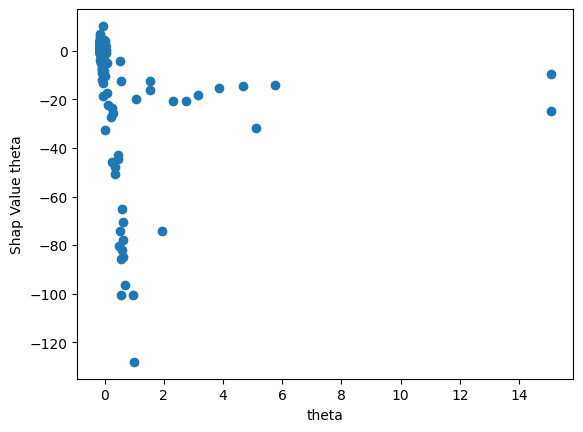

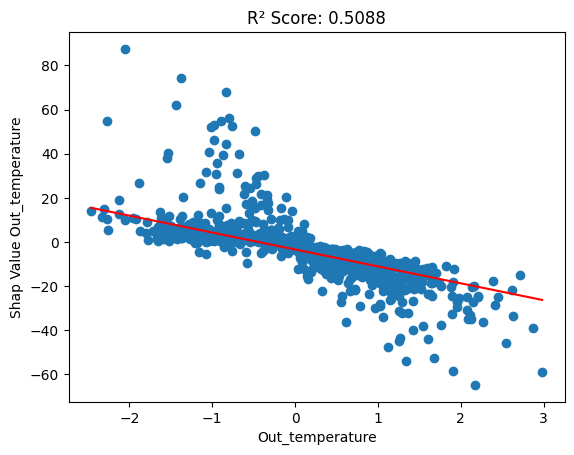

In [ ]:
# Scatter plot of shap value vs variable

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import r2_score

print(shap_values.values.shape)
print(shap_values.base_values.shape)
print(shap_values.data.shape)
print(shap_values.feature_names)

# W
x_id = shap_values.feature_names.index("W")
y_id = shap_values.feature_names.index("W")
plt.scatter(shap_values.data[:,x_id],shap_values.values[:,y_id]/1000,color='blue', label='Data Points')
plt.xlabel(shap_values.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values.feature_names[y_id])

x = shap_values.data[:,x_id]
y = shap_values.values[:,y_id]/1000
poly = PolynomialFeatures(degree=2)
x = x.reshape(-1, 1)
x_poly = poly.fit_transform(x)
model = LinearRegression()
ransac = RANSACRegressor(estimator=model, random_state=42)
ransac.fit(x_poly, y)
line_x = np.linspace(min(x), max(x), 100).reshape(-1, 1)
line_x_poly = poly.transform(line_x)
line_y = ransac.predict(line_x_poly)
plt.plot(line_x, line_y, color='red', label='RANSAC Polynomial Fit')
r2 = r2_score(y, ransac.predict(x_poly))
plt.title(f'R² Score: {r2:.4f}')

plt.xlim((-1.5,1.5))
plt.ylim((-40,100))
plt.show()

# V
x_id = shap_values.feature_names.index("V")
y_id = shap_values.feature_names.index("V")
plt.scatter(shap_values.data[:,x_id],shap_values.values[:,y_id]/1000,color='blue', label='Data Points')
plt.xlabel(shap_values.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values.feature_names[y_id])

x = shap_values.data[:,x_id]
y = shap_values.values[:,y_id]/1000
poly = PolynomialFeatures(degree=2)
x = x.reshape(-1, 1)
x_poly = poly.fit_transform(x)
model = LinearRegression()
ransac = RANSACRegressor(estimator=model, random_state=42)
ransac.fit(x_poly, y)
line_x = np.linspace(min(x), max(x), 100).reshape(-1, 1)
line_x_poly = poly.transform(line_x)
line_y = ransac.predict(line_x_poly)
plt.plot(line_x, line_y, color='red', label='RANSAC Polynomial Fit')
r2 = r2_score(y, ransac.predict(x_poly))
plt.title(f'R² Score: {r2:.4f}')

plt.show()

# theta
x_id = shap_values.feature_names.index("theta")
y_id = shap_values.feature_names.index("theta")
plt.scatter(shap_values.data[:,x_id],shap_values.values[:,y_id]/1000)
plt.xlabel(shap_values.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values.feature_names[y_id])
plt.show()

# Out temperaturex_id = shap_values.feature_names.index("Out_temperature")
y_id = shap_values.feature_names.index("Out_temperature")
plt.scatter(shap_values.data[:,x_id],shap_values.values[:,y_id]/1000)
plt.xlabel(shap_values.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values.feature_names[y_id])

x = shap_values.data[:,x_id]
y = shap_values.values[:,y_id]/1000
poly = PolynomialFeatures(degree=1)
x = x.reshape(-1, 1)
x_poly = poly.fit_transform(x)
model = LinearRegression()
ransac = RANSACRegressor(estimator=model, random_state=42)
ransac.fit(x_poly, y)
line_x = np.linspace(min(x), max(x), 100).reshape(-1, 1)
line_x_poly = poly.transform(line_x)
line_y = ransac.predict(line_x_poly)
plt.plot(line_x, line_y, color='red', label='RANSAC Polynomial Fit')
r2 = r2_score(y, ransac.predict(x_poly))
plt.title(f'R² Score: {r2:.4f}')

plt.show()


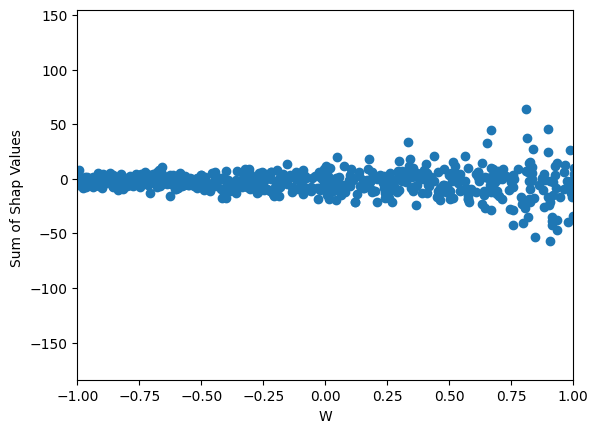

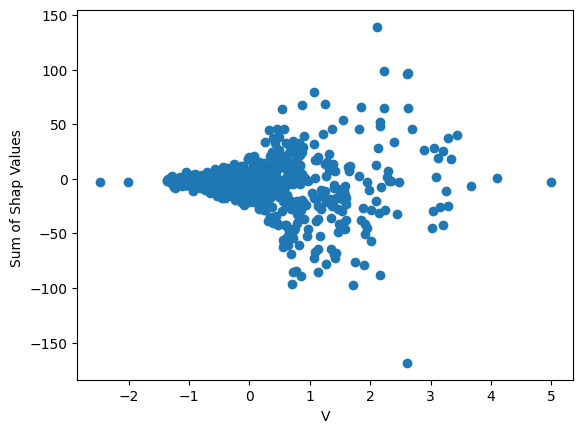

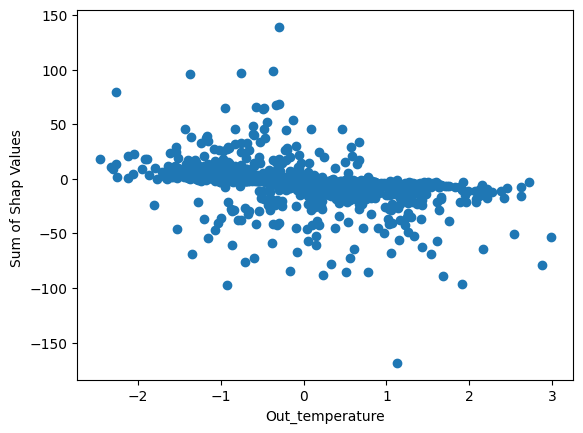

In [11]:
# Scatter plot of sum of shap values vs variable

shap_sum = np.sum(shap_values_CF.values[:,:],axis=1)
shap_sum.shape

x_id = shap_values_CF.feature_names.index("W")
plt.scatter(shap_values_CF.data[:,x_id],shap_sum/1000)
plt.xlabel(shap_values_CF.feature_names[x_id])
plt.ylabel("Sum of Shap Values ")
plt.xlim((-1,1))
plt.show()

x_id = shap_values_CF.feature_names.index("V")
plt.scatter(shap_values_CF.data[:,x_id],shap_sum/1000)
plt.xlabel(shap_values_CF.feature_names[x_id])
plt.ylabel("Sum of Shap Values ")
plt.show()

x_id = shap_values_CF.feature_names.index("Out_temperature")
plt.scatter(shap_values_CF.data[:,x_id],shap_sum/1000)
plt.xlabel(shap_values_CF.feature_names[x_id])
plt.ylabel("Sum of Shap Values ")
plt.show()